## Observations and Insights

My Observations based on the below Graphs 

1) The avereage tumor volume of durgs Capomulin (40.6 mm3) and Ramicane (40.2 mm3) suggest that these are the two promising  drugs for Pymaceuticals while are others average tumour volume ranges between 50 mm3 and 54 mm3.

2)Number of Male mouse used in the study is slightly higher than Female. Total # of Mouse :1893 , Male:958 and Female :935

3) The average tumor volume in Treatment regimen of Capomulin increases with the increase in the weight of the mouse which indicates the durg works well with mouse with lesser weight. 



## Dependencies and starter code

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [95]:
mouse_metadata.head()
study_results.head()
Research_df=pd.merge(mouse_metadata,study_results, on='Mouse ID' , how='inner')
Research_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen


Research_df = Research_df.sort_values(by=['Drug Regimen'])

Drug_Group=Research_df.groupby(['Drug Regimen'])

Drug_Index=Research_df["Drug Regimen"].unique()

## Compute the Stats
total=Drug_Group["Tumor Volume (mm3)"].count()
Mean=Drug_Group["Tumor Volume (mm3)"].mean()
Median=Drug_Group["Tumor Volume (mm3)"].median()
Var=Drug_Group["Tumor Volume (mm3)"].var()
SD=Drug_Group["Tumor Volume (mm3)"].std()
SEM=Drug_Group["Tumor Volume (mm3)"].sem()

## Load into Summary Table
Summary_1 = pd.DataFrame(list(zip(total,Mean, Median,Var,SD,SEM)), 
                 columns =['total','Mean', 'Median','Var','SD','SEM'],index=Drug_Index) 

Summary_1.head()


,total,Mean,Median,Var,SD,SEM
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466


Text(0, 0.5, 'Number of Data Points')

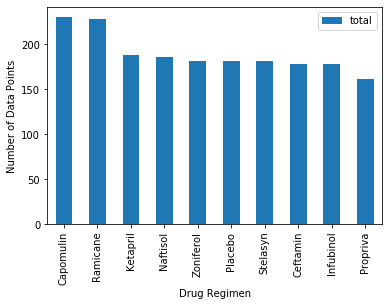

In [97]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

dr=Summary_1.sort_values(by='total',ascending=False).plot(kind='bar', y='total')

dr.set_xlabel("Drug Regimen")
dr.set_ylabel("Number of Data Points")


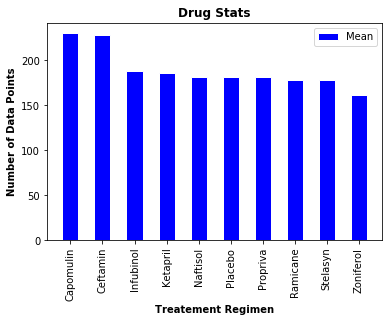

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
length = len(Summary_1.index)

x = np.arange(length)
width=.5

S_summary=Summary_1.sort_values(by='total',ascending=False)

plt.bar(x,S_summary['total'],width,color='b',alpha=1,edgecolor='white', label='Mean',align="center")

tick_locations = [value for value in x]
plt.xticks(tick_locations, Summary_1.index, rotation="vertical")

plt.title("Drug Stats" ,fontweight='bold')
plt.xlabel("Treatement Regimen",fontweight='bold')
plt.ylabel("Number of Data Points",fontweight='bold')
plt.legend()
plt.show()


## Pie plots

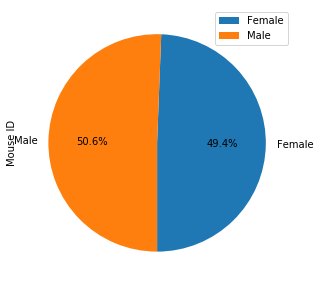

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Gender=Research_df.groupby(['Sex']).count()
Gender.plot.pie(y='Mouse ID' ,figsize=(5, 5),autopct='%1.1f%%', startangle=270, fontsize=10)

(-1.1027130801595115,
 1.105172849624489,
 -1.1002172082078998,
 1.1045613723658971)

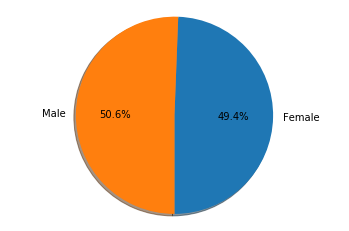

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0)
labels = ["Female","Male"]
plt.pie(Gender['Mouse ID'], explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

rslt_df=Research_df.set_index('Drug Regimen')

rslt_df=rslt_df.loc[["Capomulin", "Propriva","Ceftamin","Infubinol"]]  

TV=rslt_df['Tumor Volume (mm3)']  

quartiles = TV.quantile([.25,.5,.75])
quartiles
lowerq = quartiles[.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor_Volume is: {lowerq}")
print(f"The upper quartile of Tumor_Volume is: {upperq}")
print(f"The interquartile range of Tumor_Volume is: {iqr}")
print(f"The the median of Tumor_Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of Tumor_Volume is: 45.0
The upper quartile of Tumor_Volume is: 54.493760335000005
The interquartile range of Tumor_Volume is: 9.493760335000005
The the median of Tumor_Volume is: 47.664387100000006 
Values below 30.759359497499993 could be outliers.
Values above 68.7344008375 could be outliers.


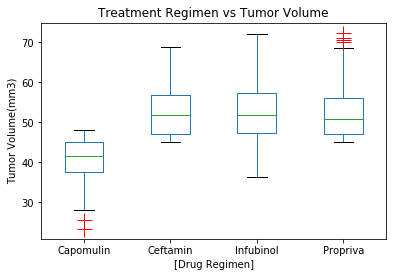

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig = plt.figure(1, figsize=(9, 6))
# ax1 = fig.add_subplot(111)

# ax1.set_title('Treatment Regimen vs Tumor Volume')
rslt_df.head()

flierprops = dict(marker='+', markerfacecolor='g', markersize=15,
                  linestyle='none', markeredgecolor='r')


ax1=rslt_df.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'],flierprops=flierprops)
ax1.set_title('Treatment Regimen vs Tumor Volume')
ax1.set_ylabel('Tumor Volume(mm3)')

plt.suptitle('')
ax1.grid(False)
plt.show()

plt.savefig('Box_plot of Treatment Regimen vs Tumour Volume.png')


## Line and scatter plots

Text(0, 0.5, 'Tumour Volumen (mm3)')

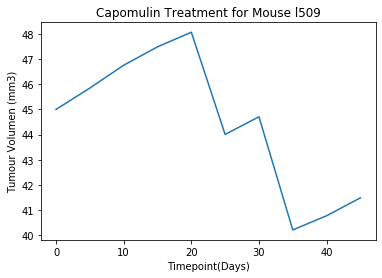

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Drug1=rslt_df.loc[["Capomulin"]]  
Drug1.reset_index
Drug1=Drug1.set_index('Mouse ID')
b742=Drug1.loc[["l509"]] 
Drug1.reset_index

x_axis=b742['Tumor Volume (mm3)'].values
y_axis=b742['Timepoint'].values

plt.plot(y_axis,x_axis)

plt.title("Capomulin Treatment for Mouse l509")
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumour Volumen (mm3)")


Text(0, 0.5, 'Average tumor volume (mm3)')

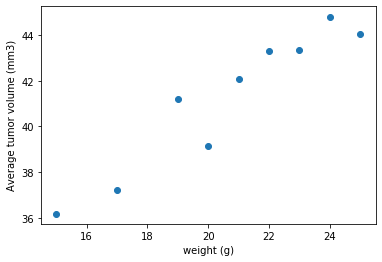

In [93]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

WeightGroup= Drug1.groupby("Weight (g)")
Mean=WeightGroup["Tumor Volume (mm3)"].mean()
x=Mean.values
y=Mean.index
plt.scatter(y,x)
plt.xlabel('weight (g)')
plt.ylabel('Average tumor volume (mm3)')





The correlation between both factors is 0.95


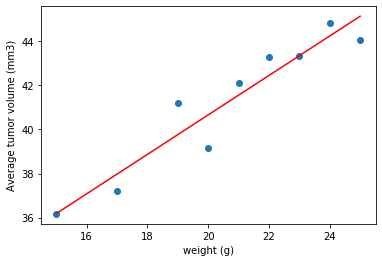

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(y,x)
plt.xlabel('weight (g)')
plt.ylabel('Average tumor volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(y, x)
regress_values = y * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(y,x)
plt.plot(y,regress_values,"r-")
